New Data:
       id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  123456         B        13.54         14.36           87.46      566.3   
1  654321         M        20.29         14.34          135.10     1297.0   
2  789012         B        12.45         15.70           82.57      477.1   
3  345678         M        19.69         21.25          130.00     1203.0   
4  901234         B        13.08         15.71           85.63      520.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.09779           0.08129         0.06664              0.04781   
1          0.10030           0.13280         0.19800              0.10430   
2          0.12780           0.17000         0.15780              0.08089   
3          0.10960           0.15990         0.19740              0.12790   
4          0.10750           0.12700         0.12060              0.07009   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst

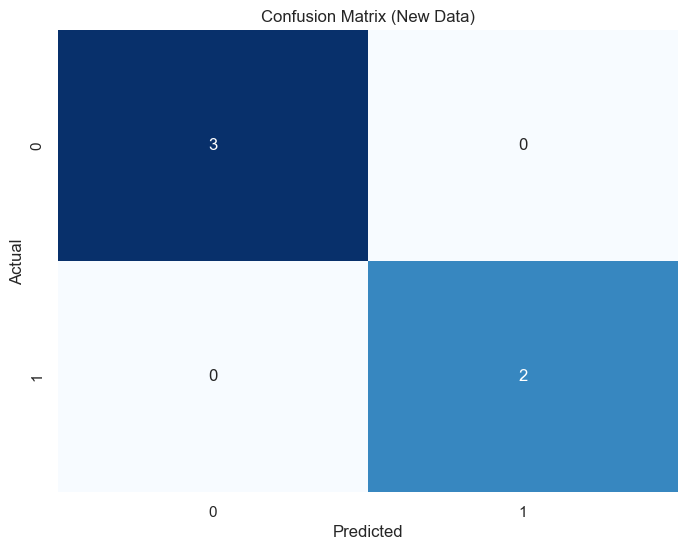


Model testing on new data completed!


In [9]:
# ## 1. Import Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Set style for plots
sns.set(style="whitegrid")

# ## 2. Load the New Data
# Load the new data from the `data/raw/` folder
new_data = pd.read_csv('../data/raw/text.csv')

# Display the first few rows of the new data
print("New Data:")
print(new_data.head())

# ## 3. Preprocess the New Data

# ### 3.1 Drop Unnecessary Columns
# Drop the `id` column as it is not useful for prediction
new_data = new_data.drop('id', axis=1)

# ### 3.2 Encode the Target Variable
# Convert `diagnosis` into binary values:
# - M (Malignant) = 1
# - B (Benign) = 0
new_data['diagnosis'] = new_data['diagnosis'].map({'M': 1, 'B': 0})

# ### 3.3 Separate Features and Target
X_new = new_data.drop('diagnosis', axis=1)
y_new = new_data['diagnosis']

# ### 3.4 Normalize Numerical Features
# Use the same scaler used for the training data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_new = scaler.fit_transform(X_new)

# ## 4. Load the Trained Models

# ### 4.1 Load the DenseNet128 Model
densenet128 = tf.keras.models.load_model('../models/densenet128_model.h5')

# ### 4.2 Load the Enhanced Random Forest Model
enhanced_rf = joblib.load('../models/enhanced_rf_model.pkl')

# ## 5. Make Predictions on the New Data

# ### 5.1 Extract Predictions from DenseNet128
# Extract predictions from DenseNet128 in batches to avoid retracing
batch_size = 32
predictions_densenet128_new = np.concatenate([
    densenet128.predict(X_new[i:i + batch_size])
    for i in range(0, len(X_new), batch_size)
])

# ### 5.2 Make Predictions Using the Enhanced Random Forest
# Make predictions using the Enhanced Random Forest
y_pred_new = enhanced_rf.predict(predictions_densenet128_new)

# ## 6. Evaluate the Model on New Data

# ### 6.1 Calculate Evaluation Metrics
# Calculate evaluation metrics
accuracy_new = accuracy_score(y_new, y_pred_new)
precision_new = precision_score(y_new, y_pred_new)
recall_new = recall_score(y_new, y_pred_new)
f1_new = f1_score(y_new, y_pred_new)

print("\nModel Evaluation Metrics on New Data:")
print("Accuracy:", accuracy_new)
print("Precision:", precision_new)
print("Recall:", recall_new)
print("F1-Score:", f1_new)

# ### 6.2 Confusion Matrix
# Generate and visualize the confusion matrix
conf_matrix_new = confusion_matrix(y_new, y_pred_new)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_new, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (New Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ## 7. Interpret the Results
# - **Accuracy**: Percentage of correctly classified samples.
# - **Precision**: Percentage of correctly predicted positive samples out of all predicted positive samples.
# - **Recall**: Percentage of correctly predicted positive samples out of all actual positive samples.
# - **F1-Score**: Harmonic mean of precision and recall.
# - **Confusion Matrix**: Visual representation of true positives, true negatives, false positives, and false negatives.

print("\nModel testing on new data completed!")